In [30]:
print("Observable Trends:")
print("\n")
print("1) Based on our analysis, we can observe that on average, Naftisol produces the largest tumors in volume on mice.")
print("\n")
print("2) With a correlation of .84 between average mouse weight and tumor size while on Capomulin, we can assume that there is a positive relationship between mouse weight and tumor size.")
print("\n")
print("3) The coefficient of determination between average mouse weight and tumor size while on Capomulin is approximately 71%. Based on this, we can assume that while weight is affecting most of the tumor size while on Capomulin, there are other factors that affect tumor size as well.")

Observable Trends:


1) Based on our analysis, we can observe that on average, Naftisol produces the largest tumors in volume on mice.


2) With a correlation of .84 between average mouse weight and tumor size while on Capomulin, we can assume that there is a positive relationship between mouse weight and tumor size.


3) The coefficient of determination between average mouse weight and tumor size while on Capomulin is approximately 71%. Based on this, we can assume that while weight is affecting most of the tumor size while on Capomulin, there are other factors that affect tumor size as well.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

complete_study_data = pd.merge(study_results, mouse_metadata, how = "left", on = ["Mouse ID", "Mouse ID"])

complete_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
num_mice = len(complete_study_data["Mouse ID"].unique().tolist())

num_mice 

249

In [4]:
duplicate_mice = complete_study_data.loc[complete_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
duplicate_mice

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [5]:
final_study_data = complete_study_data.loc[complete_study_data["Mouse ID"] != "g989"]
final_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
len(final_study_data["Mouse ID"].drop_duplicates())

248

In [7]:
regimen_mean = final_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = final_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_variance = final_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = final_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = final_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_study_data = pd.DataFrame({"Mean Tumor Volume": regimen_mean.to_list(),
                                  "Median Tumor Volume": regimen_median.to_list(),
                                  "Tumor Volume Variance": regimen_variance.to_list(),
                                  "Tumor Volume Std. Dev": regimen_std.to_list(),
                                  "Tumor Volume Std. Err": regimen_sem.to_list()}).set_index(keys = regimen_mean.index)

summary_study_data
                                  



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
aggregate_summary_data = final_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

aggregate_summary_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, '# of Observed Mouse Timepoints')

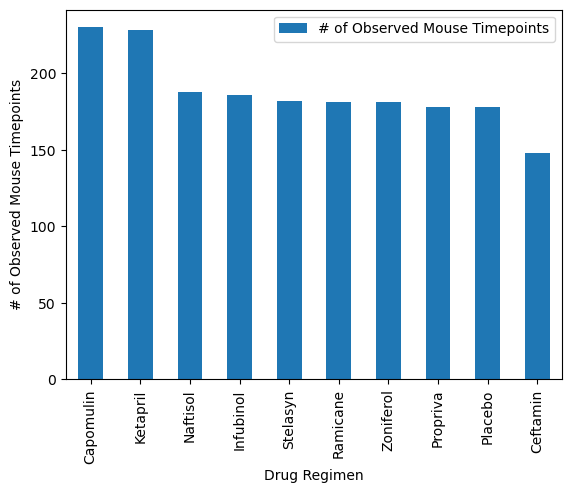

In [9]:
regimen_list_pd = final_study_data["Drug Regimen"].unique()

mice_per_regimen_pd = final_study_data["Drug Regimen"].value_counts()

mice_drug_regimen_pd = pd.DataFrame({"Drug Regimen": regimen_list_pd,
                                  "# of Observed Mouse Timepoints": mice_per_regimen_pd}).set_index(regimen_list_pd)

mice_drug_regimen_pd.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


                                  






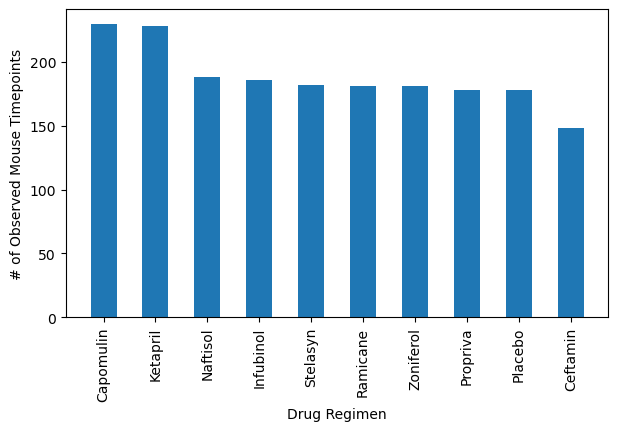

In [10]:
regimen_list = final_study_data["Drug Regimen"].unique()

mice_per_regimen = final_study_data["Drug Regimen"].value_counts().to_list()

plt.figure(figsize=(7,4))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.bar(regimen_list, mice_per_regimen, width = .5)

plt.show()

Text(0.5, 1.0, 'Sex')

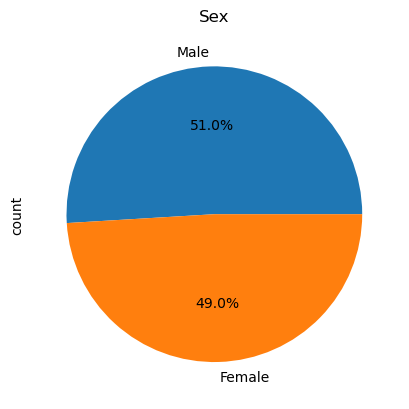

In [11]:
gender_count_pd = final_study_data["Sex"].value_counts()

gender_count_pd.plot(kind = "pie", autopct='%1.1f%%')
plt.title("Sex")

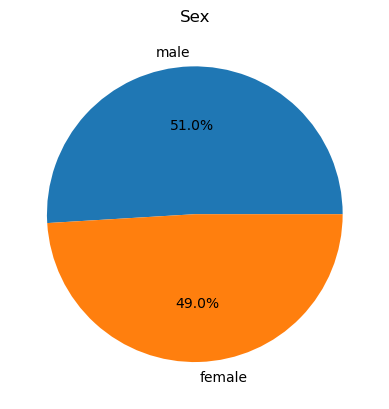

In [12]:
gender_count = final_study_data["Sex"].value_counts()

plt.pie(gender_count,autopct='%1.1f%%', labels = ["male", "female"])
plt.title("Sex")
plt.show()

In [13]:
highest_timepoint = final_study_data.groupby("Mouse ID")["Timepoint"].max()

final_study_data_updated = pd.merge(highest_timepoint, final_study_data, on = ["Mouse ID", "Timepoint"], how = "left")


In [14]:
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = []

for regimen in regimen_list:
    tumor_volume = (final_study_data_updated.loc[final_study_data_updated["Drug Regimen"] == regimen]["Tumor Volume (mm3)"])
    tumor_vol_data.append(tumor_volume)
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The interquartile range for {regimen} is {iqr}")
    print(f"For {regimen}, mice with tumor volumes below {lower_bound} and above {upper_bound} may be outliers")
    print("\n")

The interquartile range for Capomulin is 7.781863460000004
For Capomulin, mice with tumor volumes below 20.70456164999999 and above 51.83201549 may be outliers


The interquartile range for Ramicane is 9.098536719999998
For Ramicane, mice with tumor volumes below 17.912664470000003 and above 54.30681135 may be outliers


The interquartile range for Infubinol is 11.477135160000003
For Infubinol, mice with tumor volumes below 36.83290494999999 and above 82.74144559000001 may be outliers


The interquartile range for Ceftamin is 15.577752179999997
For Ceftamin, mice with tumor volumes below 25.355449580000002 and above 87.66645829999999 may be outliers




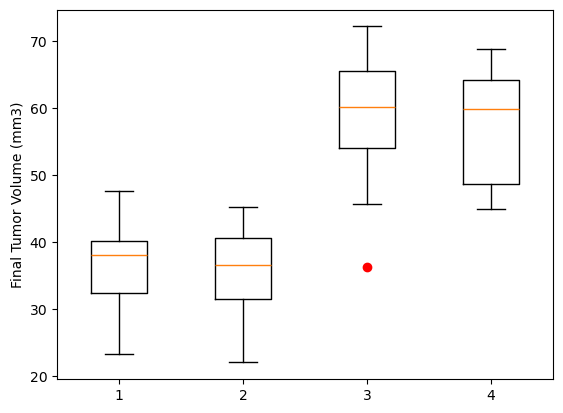

In [31]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, sym = "r")
plt.show()



    

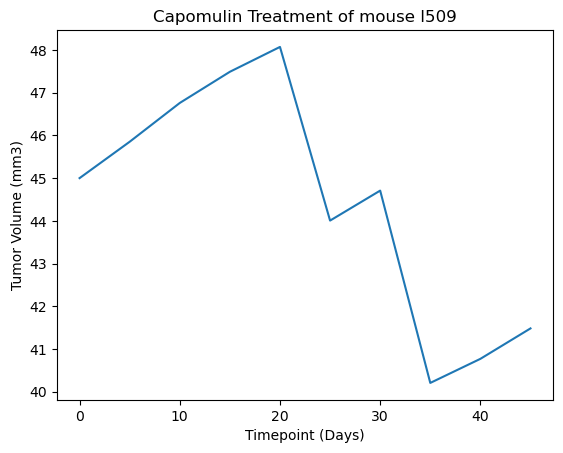

In [16]:
capomulin_mouse = final_study_data.loc[(final_study_data["Drug Regimen"] == "Capomulin") & (final_study_data["Mouse ID"] == "l509")]
timepoint_capomulin = capomulin_mouse["Timepoint"]
tumor_volume_capomulin = capomulin_mouse["Tumor Volume (mm3)"]
plt.plot(timepoint_capomulin, tumor_volume_capomulin)
plt.title("Capomulin Treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()






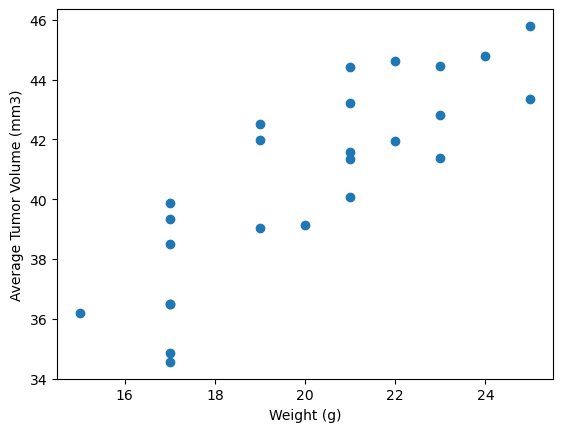

In [17]:
capomulin_mice = final_study_data.loc[final_study_data["Drug Regimen"] == "Capomulin"]
capomulin_weight = capomulin_mice.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_tumor_size = capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(capomulin_weight, capomulin_tumor_size)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


The correlation between mouse weight and tumor size is 0.84
The coefficient of determination between mouse weight and tumor size is 0.7055999999999999


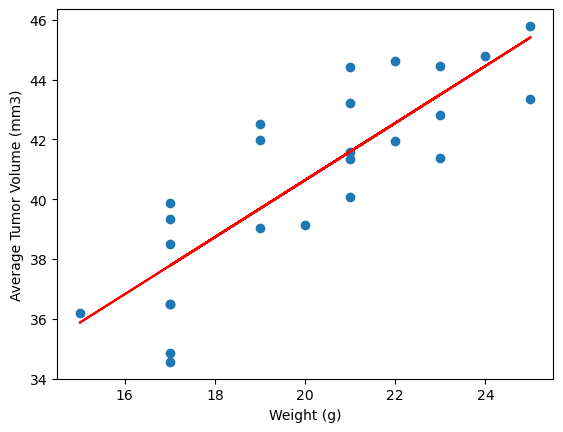

In [25]:
capomulin_mice = final_study_data.loc[final_study_data["Drug Regimen"] == "Capomulin"]
capomulin_weight = capomulin_mice.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_tumor_size = capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(capomulin_weight, capomulin_tumor_size)
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight, capomulin_tumor_size)
regression_values = slope * capomulin_weight + intercept
plt.plot(capomulin_weight,regression_values,"r-")                                                     
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

correlation = round(st.pearsonr(capomulin_weight,capomulin_tumor_size)[0],2)
r_squared = correlation**2

print(f"The correlation between mouse weight and tumor size is {correlation}")
print(f"The coefficient of determination between mouse weight and tumor size is {r_squared}")

plt.show()